In [ ]:
import simulator
import datetime
import importlib
importlib.reload(simulator)
from component import *
from simulator import Environment

# 创建了一个环境
env = Environment(truck_per_station=100,line_size=2,running_day=2,start_date=datetime.datetime(2024, 5, 1))

# 这个是环境中的厂站、工地和合同关系
stations = env.stations
projects = env.projects
interactions = env.interactions



# 初始化Dispatch列表
dispatch_list :List[Dispatch]= []
# 返回第1天的计划订单
plan_orders = env.return_next_day_plan_orders(datetime.datetime(2024, 5, 1),day_0=True)

# 安排发车计划
for order in plan_orders:
    oid = order.oid
    n_need = order.n_need
    
    pid = order.pid
    
    
    
    
    
    for i in range(n_need):
        
        dispatch_list.append(Dispatch(oid=oid,pid=order.pid,from_sid=1,dispatch_time=order.plan_arrive_time,ret_sid=1))
        
        
env.running_one_day(datetime.datetime(2024, 5, 1),dispatchs=dispatch_list,instant_orders_dispatch_method=None,reposition_method=None)




/home/jiangrenchi/RL/simulator.py:1184: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(filtered_df['deliver_time'].dt.hour >= self.order_range[0]) & (df['deliver_time'].dt.hour < self.order_range[1])]


Dispatchs can satisfy the orders, dispatchs and needs are equal.


In [6]:
dict1 = {'a': 1, 'b': [2, 3]}
dict2 = {'b': [2, 3], 'a': 1}  # 键顺序不同，但内容相同
dict3 = {'a': 1, 'b': [2, 4]}  # 值不同

print(dict1 == dict2)  # True（键和值都相同，顺序无关）
print(dict1 == dict3)  # False（值不同）

True
False


In [5]:
a = {}
b = {1:1}
assert not a

assert not b

AssertionError: 

In [3]:
a = {}

if not a:
    print('a is empty')

a is empty


{datetime.date(2024, 5, 1): [oid: 1785230502796763137 pid: 771422771870937733 quantity: 3.5 n_need: 1 n_dispatch: 0 n_finish: 0 plan_arrive_time: 2024-05-01 07:05:02 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 1225.0,
  oid: 1785294349984661505 pid: 781979182673667513 quantity: 2.0 n_need: 1 n_dispatch: 0 n_finish: 0 plan_arrive_time: 2024-05-01 07:08:13 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 700.0,
  oid: 1785245565792755713 pid: 769529942567313652 quantity: 5.0 n_need: 2 n_dispatch: 0 n_finish: 0 plan_arrive_time: 2024-05-01 07:12:34 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 1750.0,
  oid: 1785282955317735425 pid: 797289623771558620 quantity: 9.0 n_need: 1 n_dispatch: 0 n_finish: 0 plan_arrive_time: 2024-05-01 07:14:39 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 3150.0,
  oid: 1785349618281082882 pid: 890247327783252021 quantity: 7

In [11]:
env.orders_class

[oid: 1785230502796763137 pid: 771422771870937733 quantity: 3.5 n_need: 1 n_dispatch: 0 n_finish: 0 plan_arrive_time: 2024-05-01 07:05:02 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 1225.0,
 oid: 1785294349984661505 pid: 781979182673667513 quantity: 2.0 n_need: 1 n_dispatch: 0 n_finish: 0 plan_arrive_time: 2024-05-01 07:08:13 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 700.0,
 oid: 1785245565792755713 pid: 769529942567313652 quantity: 5.0 n_need: 2 n_dispatch: 0 n_finish: 0 plan_arrive_time: 2024-05-01 07:12:34 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 1750.0,
 oid: 1785282955317735425 pid: 797289623771558620 quantity: 9.0 n_need: 1 n_dispatch: 0 n_finish: 0 plan_arrive_time: 2024-05-01 07:14:39 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 3150.0,
 oid: 1785284901625786369 pid: 680006810098426428 quantity: 1.0 n_need: 1 n_dispatch: 0 n_fin

In [2]:
pid_quantity_dict = {}


for oid,order in env.unscheduled_orders.items():
    
    pid = order.pid
    q = order.quantity
    
    if pid not in pid_quantity_dict:
        pid_quantity_dict[pid]=0
        
    
    pid_quantity_dict[pid]+=q


In [3]:
pid_quantity_dict

{'797259715452215898': 3535.5,
 '890247327783252021': 12969.0,
 '706166232260612241': 9130.5,
 '830891025072717824': 6393.0,
 '863095625661666127': 5240.0,
 '680006810098426428': 5053.0,
 '680006810094231641': 2573.5,
 '771422771870937733': 6684.5,
 '797289623771558620': 3069.0,
 '680006810102620778': 3093.0,
 '751046850710315950': 5215.5,
 '892041295667729525': 59170.98,
 '805113225627856897': 6429.0,
 '913699232190354383': 5053.0,
 '883059259275753126': 4550.5,
 '724348402665714144': 6208.5,
 '680006810111008880': 3187.0,
 '688680112316604418': 1873.0,
 '709076948399374977': 4838.5,
 '820716812386804551': 533.0,
 '868581320450670593': 7556.0,
 '913805584590069989': 602.0,
 '781979182673667513': 5614.0,
 '833051041372312567': 3178.5,
 '793798976666091678': 713.0,
 '977393881907968041': 8453.5,
 '774314505789613193': 1025.0,
 '834727282420566530': 2132.5,
 '809113710869471246': 1402.5,
 '883518949403146052': 1142.0,
 '809026317189507013': 13162.150000000001,
 '680006810098426456': 1388

In [6]:
pid_list = [(pid,q) for pid,q in pid_quantity_dict.items()]

pid_list.sort(key=lambda x:x[1],reverse=True)

special_pids = [t[0] for t in pid_list[0:10]]

normal_pids = [t[0] for t in pid_list[10:]]

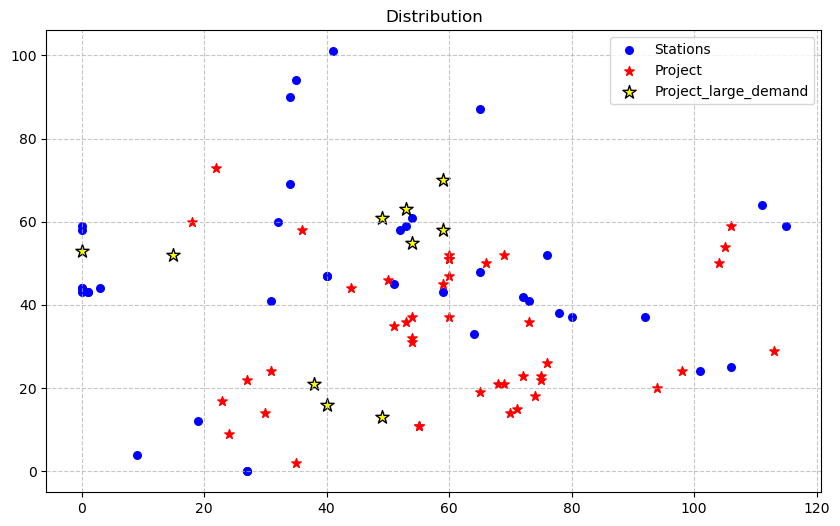

In [12]:
import matplotlib.pyplot as plt


# plt.rcParams["font.family"] = "SimHei"  # 中文字体列表
# plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题（避免负号变成方框）

"""
绘制厂站（蓝色）、普通工地（红色）和特殊关照工地（大黄星）

参数:
    station_dict: 厂站字典（键：sid，值：Station对象）
    site_dict: 工地字典（键：pid，值：(x,y)元组）
    special_pids: 特殊关照工地的pid列表（如['p2', 'p5']）
"""
# ----------------------
# 1. 提取厂站坐标
# ----------------------
station_coords = [station.coord for station in env.stations.values()]
station_x = [coord[0] for coord in station_coords]
station_y = [coord[1] for coord in station_coords]

# ----------------------
# 2. 区分普通工地和特殊工地
# ----------------------
normal_coords = []  # 普通工地坐标
special_coords = []  # 特殊关照工地坐标



for pid, coord in env.projects.items():
    if pid in special_pids:
        special_coords.append(coord)  # 特殊工地加入对应列表
    elif pid in normal_pids:
        normal_coords.append(coord)   # 普通工地加入对应列表

# 拆分普通工地的x、y
normal_x = [coord[0] for coord in normal_coords]
normal_y = [coord[1] for coord in normal_coords]

# 拆分特殊工地的x、y
special_x = [coord[0] for coord in special_coords]
special_y = [coord[1] for coord in special_coords]

# ----------------------
# 3. 绘图
# ----------------------
plt.figure(figsize=(10, 6))

# 绘制厂站（蓝色圆圈）
plt.scatter(station_x, station_y, color='blue', label='Stations', marker='o', s=30)
# 绘制普通工地（红色叉号）
plt.scatter(normal_x, normal_y, color='red', label='Project', marker='*', s=50)
# 绘制特殊工地（大黄星，星的大小和颜色可调整）
plt.scatter(special_x, special_y, color='yellow', label='Project_large_demand', 
            marker='*', s=100, edgecolors='black')  # edgecolors加黑边更醒目

# ----------------------
# 4. 添加图表元素
# ----------------------
plt.title('Distribution')

plt.legend()  # 显示图例（区分三种点）
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图像
plt.show()

In [3]:
for pid,sid_list in env.interaction.items():
    print(len(sid_list))

30
19
16
14
18
21
15
20
25
17
20
19
25
24
21
30
18
12
18
18
19
15
19
21
21
22
22
14
19
18
19
21
18
25
19
24
25
22
16
24
23
19
22
24
27
21
10
11
18
12
15
17
13
18
26
24
14
26
24
23
15
23
24
19
9
27
24
21


In [4]:
env.interaction

{'680807003891019801': {'1631470956459929601': 18.5,
  '738115065915781403': 27.5,
  '754429282184478753': 23.0,
  '1663425866110771202': 9.5,
  '1673235371280293890': 20.5,
  '875336708021883376': 22.5,
  '755721905675469311': 23.0,
  '1686320649152536578': 30.0,
  '726724594072978268': 16.5,
  '1684498296029155329': 25.5,
  '1698883759877332993': 19.5,
  '740610164377510154': 25.5,
  '1694634526754066434': 2.0,
  '1703960484185190401': 17.0,
  '1672793905165828098': 18.0,
  '817842322489260752': 21.0,
  '1675689651580084225': 17.0,
  '1701841396001579010': 17.0,
  '1675758041380331521': 14.0,
  '844137252899878353': 25.0,
  '792763260305761702': 28.0,
  '719204845147540861': 24.0,
  '751793100959345572': 18.0,
  '726725000148873341': 17.5,
  '1698229777311932417': 22.0,
  '1782242566936788994': 9.5,
  '1778403021227503617': 23.5,
  '1793108185511309313': 20.5,
  '817012601010639199': 12.0,
  '1795364692931813378': 17.5},
 '706166232260612241': {'1631470956459929601': 12.5,
  '7381150

In [7]:
d = {d:len(item) for d, item in env.interaction.items()}
d

{'680807003891019801': 30,
 '706166232260612241': 19,
 '833051041372312567': 16,
 '680006810102620796': 14,
 '809026317189507013': 18,
 '820716812386804551': 21,
 '737416575015256065': 15,
 '781979182673667513': 20,
 '787690087260620998': 25,
 '680006810098426406': 17,
 '813079344774959120': 20,
 '774314505789613193': 19,
 '680006810102620760': 25,
 '709076948399374977': 24,
 '858037705496490216': 21,
 '680006810106814467': 30,
 '680006810098426442': 18,
 '680006810098426428': 12,
 '863095625661666127': 18,
 '680006810102620766': 18,
 '809113710869471246': 19,
 '688680112316604418': 15,
 '680006810102620808': 19,
 '769529942567313652': 21,
 '680006810094231641': 21,
 '830891025072717824': 22,
 '883059259275753126': 22,
 '680006810106814507': 14,
 '680006810111008880': 19,
 '1655392172437471233': 18,
 '706166232260612237': 19,
 '749241657207267377': 21,
 '890247327783252021': 18,
 '771422771870937733': 25,
 '797259715452215898': 19,
 '716322831410942040': 24,
 '680006810102620770': 25,


In [73]:
from model import *

model = ScoreNetwork(7,64)

model.load_state_dict(torch.load("./result/model_params_0513.pth"))


# 打印模型参数（可选）
for name, param in model.named_parameters():
    print(f"Parameter name: {name}")
    print(f"Parameter value: {param}")
    print("-" * 50)

Parameter name: sn.0.weight
Parameter value: Parameter containing:
tensor([[-0.0028,  0.2028, -0.3111, -0.2782, -0.1456,  0.1014, -0.0075],
        [ 0.2997, -0.0397,  0.0939, -0.1203, -0.0743, -0.3611, -0.2503],
        [-0.1510,  0.0074,  0.1454,  0.2185, -0.2705, -0.1559,  0.1610],
        [ 0.2996, -0.0930,  0.2671, -0.0769,  0.0391,  0.3552, -0.3372],
        [-0.2411, -0.0901, -0.1423,  0.3028, -0.2310, -0.1833, -0.2899],
        [-0.3444, -0.2267,  0.3202,  0.1536,  0.1694,  0.0261, -0.1740],
        [ 0.0639, -0.3529, -0.2731, -0.1949,  0.2385,  0.2216, -0.1676],
        [-0.0156,  0.2462,  0.3815,  0.1648,  0.0643,  0.2412, -0.2511],
        [ 0.0704, -0.2930, -0.2620, -0.1953,  0.1710,  0.1520, -0.2239],
        [ 0.1084,  0.2127, -0.0432,  0.0214,  0.1006,  0.2277,  0.3412],
        [-0.2876, -0.1443,  0.1442,  0.3082,  0.3148,  0.3421,  0.0996],
        [-0.3287,  0.0348, -0.2365, -0.3522,  0.3358,  0.2874, -0.3770],
        [ 0.0707, -0.0637, -0.0622, -0.1730,  0.1453, -0.

/tmp/ipykernel_207239/1059486780.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("./result/model_params_0513.pth"))


In [7]:
from bisect import bisect_left, bisect_right
from datetime import datetime, timedelta

def count_elements_in_range(datetime_list, start_time, time_range):
    """
    统计从开始时间到结束时间范围内的 datetime 列表中元素的个数。

    :param datetime_list: 按时间从小到大排序的 datetime 列表
    :param start_time: 开始时间 (datetime 对象)
    :param time_range: 时间范围 (以分钟为单位)
    :return: 范围内的元素个数
    """
    # 计算结束时间
    end_time = start_time + timedelta(minutes=time_range)
    
    # 使用 bisect 找到开始时间和结束时间的索引
    start_index = bisect_left(datetime_list, start_time)
    end_index = bisect_right(datetime_list, end_time)
    print(start_index, end_index)  # 调试输出索引
    # 统计范围内的元素数量
    return end_index - start_index

# 示例用法
datetime_list = [
    datetime(2025, 5, 13, 8, 0),
    datetime(2025, 5, 13, 8, 30),
    datetime(2025, 5, 13, 9, 0),
    datetime(2025, 5, 13, 10, 0),
    datetime(2025, 5, 13, 12, 0),
]

start_time = datetime(2025, 5, 13, 8, 15)
time_range = 120  # 2小时

result = count_elements_in_range(datetime_list, start_time, time_range)
print(result)  # 输出: 3

1 4
3


In [33]:
import copy
from component import Order
class MyClass:
    def __init__(self):
        self.list1 = {}
        self.list2 = {}

# 创建实例
obj = MyClass()
shared_item = Order(100,100,1000,10,datetime(2025, 5, 13, 8, 0))
obj.list1['1']=shared_item
obj.list2['2']=shared_item

# 深拷贝
copied_obj = copy.deepcopy(obj)

# 修改原始对象中的共享项
copied_obj.list1['1'].n_dispatch = 99

print(copied_obj.list1['1'])  # 输出: [99, 2, 3]
print(copied_obj.list2['2'])  # 输出: [99, 2, 3]

oid: 100 pid: 100 quantity: 1000 n_need: 10 n_dispatch: 99 n_finish: 0 plan_arrive_time: 2025-05-13 08:00:00 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 350000
oid: 100 pid: 100 quantity: 1000 n_need: 10 n_dispatch: 99 n_finish: 0 plan_arrive_time: 2025-05-13 08:00:00 finish_time: 2000-01-01 00:00:00 last_cast_time: None overtime_count: 0 revenue: 350000


In [12]:
id(copied_obj.list2[0] )

139915877759040

In [ ]:
class MyClass:
    def __init__(self, value):
        self.value = value

# 创建一个列表 b
b = [MyClass(i) for i in range(5)]

# 创建一个独立的副本 a，但元素引用相同
a = b.copy()  # 或者 a = b[:]

# 弹出 b 的一个元素
popped_element = b.pop()

print(f"Popped element value: {popped_element.value}")  # 输出被弹出的元素值
print(f"Length of b: {len(b)}")  # 输出 b 的长度
print(f"Length of a: {len(a)}")  # 输出 a 的长度



# 检查元素引用
print(f"a[0] value: {a[0].value}")  # 输出 a 中第一个元素的值
print(f"Are a[0] and b[0] the same object? {'Yes' if a[0] is b[0] else 'No'}")  # 检查引用

Popped element value: 4
Length of b: 4
Length of a: 5
a[0] value: 0
Are a[0] and b[0] the same object? Yes


In [5]:
import numpy as np

a = np.zeros(10)

1/a

C:\Windows\Temp\ipykernel_22892\1896342395.py:5: RuntimeWarning: divide by zero encountered in divide
  1/a


array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [1]:
from tqdm import tqdm
import time
for i in tqdm(range(10)):
    time.sleep(0.5)

100%|██████████| 10/10 [00:05<00:00,  2.00it/s]


In [2]:
import numpy as np

# 示例列表
data = [3, 1, 4, 1, 5, 9, 2, 6, 5]

# 使用argmin找到最小值的索引
index_of_min = np.argmin(data)

print("最小值的索引:", index_of_min)

最小值的索引: 1


In [1]:
from simulator import *


env = Environment()

for order in env.orders[0:10]:
    print(order)

{'deliver_time': Timestamp('2024-05-01 00:10:25'), 'order_id': 1785334604837023745, 'order_quantity': 35.0, 'project_id': '809113710869471246', 'create_time': Timestamp('2024-04-30 23:45:14'), 'ticket_count': 4, 'pouring_type': '自卸', 'id': 1}
{'deliver_time': Timestamp('2024-05-01 03:00:00'), 'order_id': 1785261120393117697, 'order_quantity': 2.0, 'project_id': '892041295667729525', 'create_time': Timestamp('2024-04-30 18:53:14'), 'ticket_count': 1, 'pouring_type': '自卸', 'id': 4}
{'deliver_time': Timestamp('2024-05-01 03:02:39'), 'order_id': 1785293438860197889, 'order_quantity': 13.0, 'project_id': '883059259275753126', 'create_time': Timestamp('2024-04-30 21:01:40'), 'ticket_count': 1, 'pouring_type': '自卸', 'id': 5}
{'deliver_time': Timestamp('2024-05-01 03:37:44'), 'order_id': 1785313193804296193, 'order_quantity': 4.0, 'project_id': '883059259275753126', 'create_time': Timestamp('2024-04-30 22:20:10'), 'ticket_count': 1, 'pouring_type': '自卸', 'id': 6}
{'deliver_time': Timestamp('20

In [2]:

def meta_func(func,x,n):
    
    for i in range(n):
        
        x = func(x)
        
    return x


def times2(x):
    return x * 2

def plus2(x):
    return x + 2


x = meta_func(times2, 3, 5)
x = meta_func(plus2, x, 5)
print(x)

        
        
    
    

106
